# 实操案例 - 共享单车之租赁需求预估

## 简介

共享单车是共享经济中的一种形式，某机构提供了美国某共享单车公司的部分数据，这些数据对于研究人员是极具吸引力的。因为明确记录了每天的天气、温度、湿度、风速、季节等信息。本实操案例需要你使用这些数据，并构建模型来预测美国华盛顿区的共享单车的租赁需求。

## 1. 数据探索与可视化

### 任务描述

编写python代码，完成一天中不同时间段的平均租赁数量的可视化功能。

### 相关知识

完成本任务所需的知识点：

1. 读取数据
2. 数据探索与可视化

### 操作步骤

#### 1.1 读取数据

数据保存在`./input_data/bike_train.csv`中，共享单车的训练集数据总共有8709个训练样本，训练样本中有12个特征(其中count为标签)。特征说明如下：

- `datetime`：时间。年月日小时格式
- `season`：季节。1：春天；2：夏天；3：秋天；4：冬天
- `holiday`：是否节假日。0：否；1：是
- `workingday`：是否工作日。0：否；1：是
- `weather`：天气。1：晴天；2：阴天；3：小雨或小雪；4：恶劣天气
- `temp`：实际温度
- `atemp`：体感温度
- `humidity`：湿度
- `windspeed`：风速
- `casual`：未注册用户租车数量
- `registered`：注册用户租车数量
- `count`：总租车数量

【案例实操】使用Pandas读取共享单车训练数据：

In [44]:
import pandas as pd

bike_train_df = pd.read_csv('./input_data/bike_train.csv')
bike_train_df.head().T

,0,1,2,3,4
datetime,2011-06-14 03:00:00,2011-06-15 17:00:00,2012-05-19 19:00:00,2011-01-10 14:00:00,2012-12-09 00:00:00
season,2,2,2,1,4
holiday,0,0,0,0,0
workingday,1,1,0,1,0
weather,1,1,1,2,2
temp,23.78,30.34,28.7,8.2,16.4
atemp,27.275,32.575,31.82,9.85,20.455
humidity,53,28,39,40,87
windspeed,22.0028,7.0015,8.9981,15.0013,8.9981
casual,1,83,203,0,15


#### 1.2 数据探索与可视化

一般拿到数据之后都需要做数据探索(Exploratory Data Analysis, EDA)，因为我们需要看看数据到底长什么样子，有什么特性是可以挖掘出来的。假设我们需要看看数据的大概分布是什么样的。可以用pandas提供的describe()函数。

【案例实操】查看共享单车数据集的描述性统计信息：

In [45]:
bike_train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
season,8709.0,2.513147,1.117147,1.00,2.0000,3.000,4.0000,4.0000
holiday,8709.0,0.028132,0.165359,0.00,0.0000,0.000,0.0000,1.0000
workingday,8709.0,0.680905,0.466153,0.00,0.0000,1.000,1.0000,1.0000
weather,8709.0,1.416925,0.634626,1.00,1.0000,1.000,2.0000,4.0000
temp,8709.0,20.234293,7.793382,0.82,13.9400,20.500,26.2400,41.0000
atemp,8709.0,23.670333,8.485956,0.76,16.6650,24.240,31.0600,45.4550
humidity,8709.0,61.856585,19.248692,0.00,47.0000,62.000,77.0000,100.0000
windspeed,8709.0,12.792346,8.183524,0.00,7.0015,12.998,16.9979,56.9969
casual,8709.0,35.868756,50.187365,0.00,4.0000,16.000,48.0000,367.0000
registered,8709.0,155.055230,150.840582,0.00,36.0000,118.000,222.0000,886.0000


可以看到`count`的标准差很大，可以将`count`的数据分布可视化，以便更直观地了解其分布情况。

【案例实操】对`count`进行可视化，绘制其直方图：

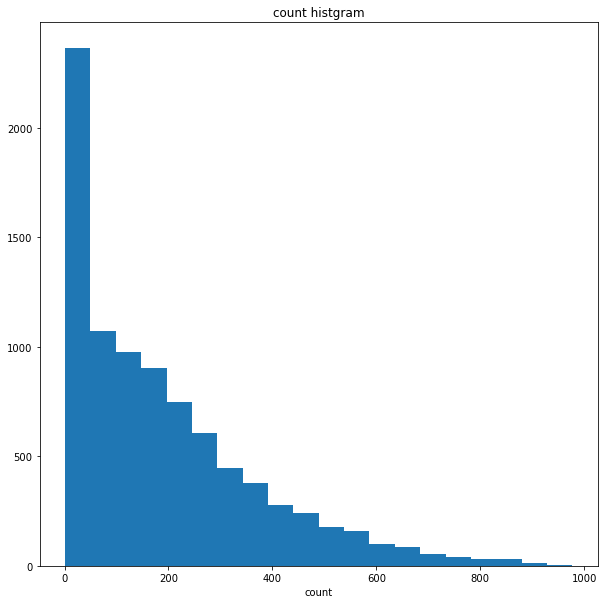

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
# 绘制直方图
plt.hist(bike_train_df['count'], bins=20)
plt.title('count histgram')
plt.xlabel('count')
plt.show()

从可视化结果可以看出，`count`的整体的分布倾斜比较严重，需要处理一下，否则可能会导致比较严重的过拟合。此时我们可以考虑将`count`的数值在3个标准差之外的样本给扔掉，减少训练集中的噪声，并对`count`做log变换。

【案例实操】筛选出3个标准差之内的数据，并进行log变换，然后使用seaborn对结果进行可视化，绘制分布图：

In [47]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# 筛选3个标准差以内的数据
criterion = np.abs(bike_train_df['count'] - bike_train_df['count'].mean()) <= 3 * bike_train_df['count'].std()
bike_train_df_ =bike_train_df[criterion]
bike_train_df_.shape

(8591, 12)

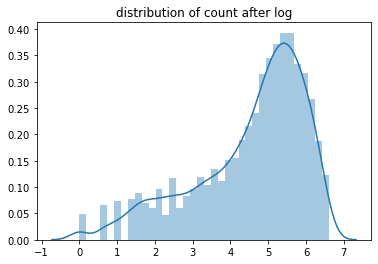

In [48]:
# log变换
y = bike_train_df_['count'].values
y_log = np.log(y)

# 可视化
sns.distplot(y_log)
plt.title('distribution of count after log')
plt.show()

可以从可视化结果看出，转换过后，`count`的分布倾斜没有那么严重了，差异也变小了。

接下来我们看看其他的一些特征对于共享单车租赁量的影响。首先来看看季节对于租赁量的影响。

【案例实操】根据季节（`season`）对共享单车的租赁量进行可视化，绘制其随着季节变化的趋势图：

Text(0.5, 1.0, 'count in different season')

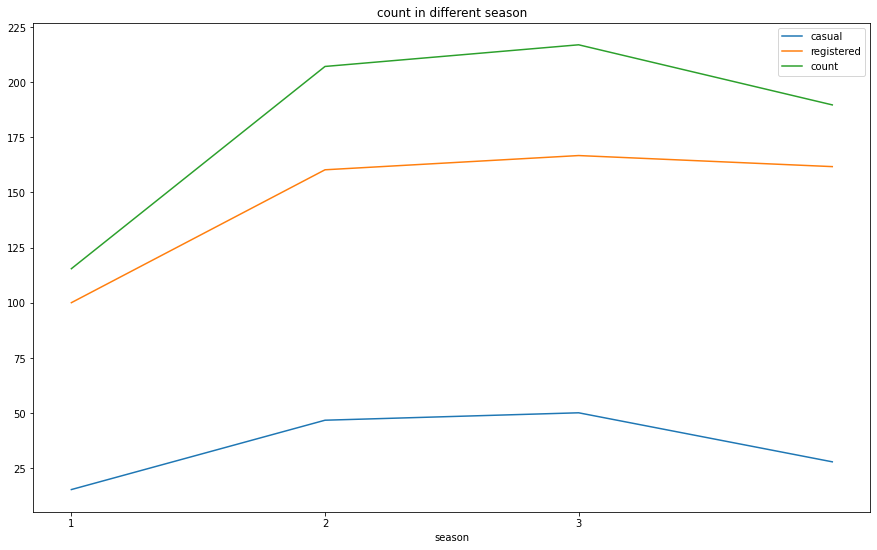

In [49]:
# 先按时间聚合
day_df = bike_train_df_.groupby('datetime').agg({
    'season': 'mean',
    'casual': 'sum',
    'registered': 'sum',
    'count': 'sum',
    'temp': 'mean',
    'atemp': 'mean',
    'holiday': 'mean'
})
# 再按季节计算（聚合）临时和注册用户数和平均租赁量
season_day_mean = day_df.groupby(['season'], as_index=True).agg({
    'casual': 'mean',
    'registered': 'mean',
    'count': 'mean'
})
# 按季节计算（聚合）平均气温和体感温度
season_temp_df = day_df.groupby(['season'], as_index=True).agg({
    'temp':'mean',
    'atemp':'mean'
})

# 绘制未注册、已注册用户和租赁平均数量随季节变化的趋势图
season_day_mean.plot(figsize=(15,9),xticks=range(1,4))
plt.title('count in different season')

从可视化结果可以看出，临时用户和注册用户用车数量变化趋势大体一致，且两年间都在秋季左右达到了比较高的用车辆，说明美国人也都比较喜欢在这段时间外出游玩。这是符合常理的。

接下来看看天气对租赁数量的影响。

【案例实操】根据天气（`weather`）对每小时平均租赁数量进行可视化，绘制堆叠式条形图：

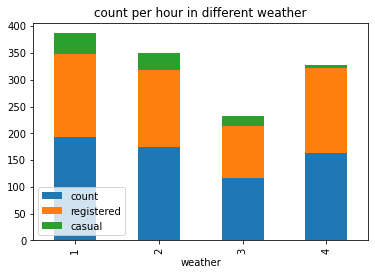

In [50]:
weather_group=bike_train_df_.groupby(['weather'])
weather_count=weather_group[['count','registered','casual']].count()
weather_mean=weather_group[['count','registered','casual']].mean()
# 不同天气的每小时平均租赁数量
weather_mean.plot.bar(stacked=True, title='count per hour in different weather')
plt.show()

天气比较好的时侯，骑共享单车的人才比较多。但上图中像4(恶劣天气)这种天气的租赁数量也比较高，这是不是有点反常呢？我们可以从数据集中找出对应的数据看看。

【案例实操】查看“恶劣天气“的数据行：

In [51]:
bike_train_df_.loc[bike_train_df.weather==4].T

,8149
datetime,2012-01-09 18:00:00
season,1
holiday,0
workingday,1
weather,4
temp,8.2
atemp,11.365
humidity,86
windspeed,6.0032
casual,6


数据的时间是下午6点，刚好是下班的高峰期，所以能够理解为什么这条数据对应的租赁量均值那么高了，这也是符合常理的。

那么一天中不同时间段对于租赁数量有什么样的影响呢？

【案例实操】按照小时`hour`这个特征分组，然后求每一组的`count`的平均值。并绘制一天中平均租赁数量随时间段（小时）变化的趋势图：

In [52]:
# 由于小时包含在日期属性中，需要从日期中把小时提取出来并转换为整数，以便按小时排序
extract_hour = lambda dt:dt.split()[1].split(':')[0]
bike_train_df_ = bike_train_df_.copy()
bike_train_df_.loc[:,'hour'] = bike_train_df_.datetime.apply(extract_hour).astype(int)

In [53]:
bike_train_df_.head().T

,0,1,2,3,4
datetime,2011-06-14 03:00:00,2011-06-15 17:00:00,2012-05-19 19:00:00,2011-01-10 14:00:00,2012-12-09 00:00:00
season,2,2,2,1,4
holiday,0,0,0,0,0
workingday,1,1,0,1,0
weather,1,1,1,2,2
temp,23.78,30.34,28.7,8.2,16.4
atemp,27.275,32.575,31.82,9.85,20.455
humidity,53,28,39,40,87
windspeed,22.0028,7.0015,8.9981,15.0013,8.9981
casual,1,83,203,0,15


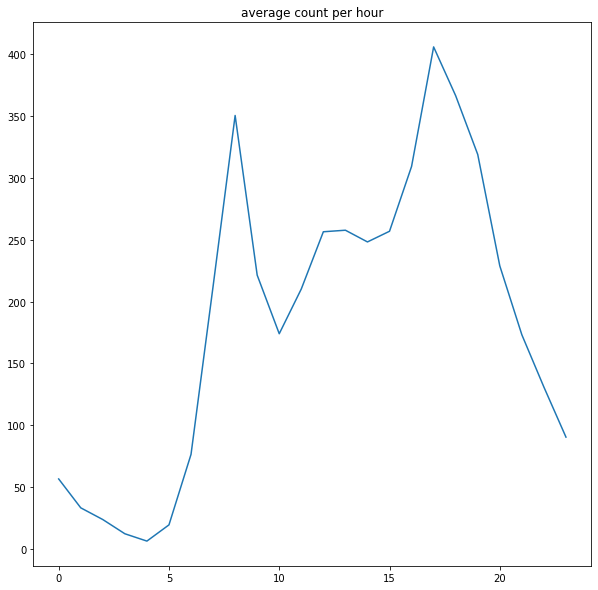

In [54]:
group_hour=bike_train_df_.groupby(bike_train_df_.hour)
hour_mean=group_hour[['count','registered','casual']].mean()

fig=plt.figure(figsize=(10,10))
plt.plot(hour_mean['count'])
plt.title('average count per hour')
plt.show()

## 2. 特征工程

### 任务描述

编写python代码，选择相关性较弱的特征，并对时间进行细化，创建新的特征。

### 相关知识

完成本任务所需的操作：

1. 相关性分析
2. 特征选择

### 操作步骤

#### 2.1 相关性分析

在选择特征之前，我们可以看看各个特征相关性的强弱。

【案例实操】计算共享单车数据集中特征之间的相关性，并绘制热力图：

In [55]:
# 计算特征对的相关性
corr_df = bike_train_df_.corr()
corr_abs_df = abs(corr_df)
corr_abs_df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
season,1.000000,0.035963,0.018112,0.009423,0.259684,0.266120,0.201259,0.152172,0.091342,0.157166,0.155856,0.015135
holiday,0.035963,1.000000,0.247976,0.002901,0.008124,0.003065,0.007045,0.001561,0.049848,0.017463,0.000625,0.001027
workingday,0.018112,0.247976,1.000000,0.034434,0.023979,0.017857,0.009167,0.016451,0.331289,0.096974,0.019760,0.001328
weather,0.009423,0.002901,0.034434,1.000000,0.046300,0.047202,0.401857,0.011528,0.125143,0.100158,0.119339,0.017099
temp,0.259684,0.008124,0.023979,0.046300,1.000000,0.985458,0.050873,0.018712,0.453380,0.299362,0.380420,0.137267
atemp,0.266120,0.003065,0.017857,0.047202,0.985458,1.000000,0.031460,0.059095,0.450016,0.296912,0.377409,0.133143
humidity,0.201259,0.007045,0.009167,0.401857,0.050873,0.031460,1.000000,0.321078,0.335021,0.257575,0.310849,0.275874
windspeed,0.152172,0.001561,0.016451,0.011528,0.018712,0.059095,0.321078,1.000000,0.094673,0.094060,0.105240,0.152314
casual,0.091342,0.049848,0.331289,0.125143,0.453380,0.450016,0.335021,0.094673,1.000000,0.494054,0.703117,0.293877
registered,0.157166,0.017463,0.096974,0.100158,0.299362,0.296912,0.257575,0.094060,0.494054,1.000000,0.965608,0.382983


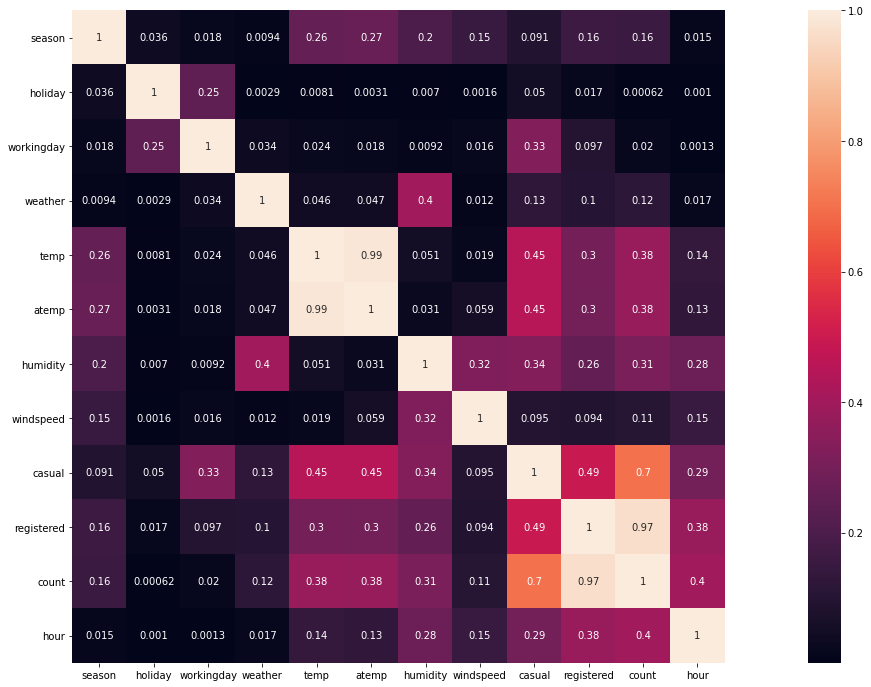

In [56]:
# 绘制热力图
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=corr_abs_df, square=True, annot=True, cbar=True)
plt.show()

热力图中的颜色越亮（浅），代表线性相关性越高。

#### 2.2 选择特征

在使用相关性这一指标来选择特征时，通常选择**相关性较低**，也就是颜色较暗的特征。因为如果选择相关性较高的，比如`temp`和`atemp`。从图可以看出这两个特征的相关性很高，也就是说在训练模型的时候，这两个特征所对应的权重是成比例的。既然成比例，那么之选其中一个就行了。

根据热力图我们可以选择时段（`hour`）、温度（`temp`）、湿度（`humidity`）、季节（`season`）、天气（`weather`）、风速（`windspeed`）、是否工作日（`workingday`）、是否假日（`holiday`
、注册用户租赁数量(`registered`)作为特征。

【案例实操】在现有分析的基础上选择上述特征，创建新的训练集：

In [66]:
bike_train2_df = bike_train_df_.drop(['atemp','count', 'casual'], axis=1)
bike_train2_df.head().T

,0,1,2,3,4
datetime,2011-06-14 03:00:00,2011-06-15 17:00:00,2012-05-19 19:00:00,2011-01-10 14:00:00,2012-12-09 00:00:00
season,2,2,2,1,4
holiday,0,0,0,0,0
workingday,1,1,0,1,0
weather,1,1,1,2,2
temp,23.78,30.34,28.7,8.2,16.4
humidity,53,28,39,40,87
windspeed,22.0028,7.0015,8.9981,15.0013,8.9981
registered,1,555,229,47,103
hour,3,17,19,14,0


`datetime`这个字段有必要再细化挖掘一下，比如细化成年份、月份、日期、星期几等，以便于从不同时间尺度考查共享单车租赁数量的变化情况。

【案例实操】将`bike_train2_df`中的`datetime`字段进行细化，细化为`year`（年份）、`month`（月份）、`date`（日期）、`weekday`（星期几）、`hour`（小时）：

In [67]:
from datetime import datetime

bike_train2_df_ = bike_train2_df.copy()
bike_train2_df_['date'] = bike_train2_df.datetime.apply(
    lambda dt: dt.split()[0]
)
bike_train2_df_['hour'] = bike_train2_df.datetime.apply(
    lambda dt: dt.split()[1].split(':')[0]
).astype(int)
bike_train2_df_['year'] = bike_train2_df.datetime.apply(
    lambda dt: dt.split()[0].split('-')[0]
).astype(int)
bike_train2_df_['month'] = bike_train2_df.datetime.apply(
    lambda dt: dt.split()[0].split('-')[1]
).astype(int)
bike_train2_df_['weekday'] = bike_train2_df_.date.apply(
    lambda dt: datetime.strptime(dt, '%Y-%m-%d').isoweekday()
)
bike_train2_df_.head().T

,0,1,2,3,4
datetime,2011-06-14 03:00:00,2011-06-15 17:00:00,2012-05-19 19:00:00,2011-01-10 14:00:00,2012-12-09 00:00:00
season,2,2,2,1,4
holiday,0,0,0,0,0
workingday,1,1,0,1,0
weather,1,1,1,2,2
temp,23.78,30.34,28.7,8.2,16.4
humidity,53,28,39,40,87
windspeed,22.0028,7.0015,8.9981,15.0013,8.9981
registered,1,555,229,47,103
hour,3,17,19,14,0


## 3. 租赁需求预估

### 任务描述

编写python代码，实现租赁需求预估。

### 相关知识

完成本任务所需的操作：

- 独热编码
- sklearn机器学习算法的使用
- 生成预测结果

### 操作步骤

#### 3.1 独热编码

一般来说，代表类型型的特征我们需要对其进行独热编码。像数据中季节这种类别型的特征，应该使用独热编码。因为如果使用原始的1、2、3、4的话，机器学习算法可能会认为4这个季节更重要。为了防止这种偏见，我们就需要对其进行独热编码。

独热编码其实很简单，就是将待编码的特征的所有可能的取值列出来，然后再在对应的位置上填1，其他位置填0。可以看成是二进制的一种变形。

【案例实操】对`bike_train2_df_`中的`season`、`year`、`month`、`weather`列进行独热编码：

In [68]:
season_dummies = pd.get_dummies(bike_train2_df_['season'], prefix='season')
season_dummies.head()

,season_1,season_2,season_3,season_4
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,1,0,0,0
4,0,0,0,1


In [69]:
year_dummies = pd.get_dummies(bike_train2_df_['year'], prefix='year')
year_dummies.head()

,year_2011,year_2012
0,1,0
1,1,0
2,0,1
3,1,0
4,0,1


In [70]:
month_dummies = pd.get_dummies(bike_train2_df_['month'], prefix='month')
month_dummies.head()

,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1


In [71]:
weather_dummies = pd.get_dummies(bike_train2_df_['weather'], prefix='weather')
weather_dummies.head()

,weather_1,weather_2,weather_3,weather_4
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,0,1,0,0
4,0,1,0,0


#### 3.2 选择并使用sklearn机器学习算法

`sklearn`中提供了非常多的机器学习算法的接口，例如逻辑回归、弹性网络、随机森林等等。而且使用起来非常简单，只需要`fit`、`predict`二连即可。对共享单车的租赁需求量做预测问题是一个回归问题，可以使用回归模型。

【案例实操】构建训练集并使用`sklearn`的岭回归模型`Ridge`进行训练：

In [72]:
bike_train2_df_.head().T

,0,1,2,3,4
datetime,2011-06-14 03:00:00,2011-06-15 17:00:00,2012-05-19 19:00:00,2011-01-10 14:00:00,2012-12-09 00:00:00
season,2,2,2,1,4
holiday,0,0,0,0,0
workingday,1,1,0,1,0
weather,1,1,1,2,2
temp,23.78,30.34,28.7,8.2,16.4
humidity,53,28,39,40,87
windspeed,22.0028,7.0015,8.9981,15.0013,8.9981
registered,1,555,229,47,103
hour,3,17,19,14,0


In [73]:
bike_train2_df_ = pd.concat(
    [bike_train2_df, season_dummies, year_dummies, month_dummies, weather_dummies],
    axis=1
)

bike_train2_df_.head().T

,0,1,2,3,4
datetime,2011-06-14 03:00:00,2011-06-15 17:00:00,2012-05-19 19:00:00,2011-01-10 14:00:00,2012-12-09 00:00:00
season,2,2,2,1,4
holiday,0,0,0,0,0
workingday,1,1,0,1,0
weather,1,1,1,2,2
temp,23.78,30.34,28.7,8.2,16.4
humidity,53,28,39,40,87
windspeed,22.0028,7.0015,8.9981,15.0013,8.9981
registered,1,555,229,47,103
hour,3,17,19,14,0


In [74]:
# 训练集的输入特征
X_train = bike_train2_df_.drop(
    ['datetime', 'season', 'weather'],
    axis=1
)
X_train.head().T

,0,1,2,3,4
holiday,0.0000,0.0000,0.0000,0.0000,0.0000
workingday,1.0000,1.0000,0.0000,1.0000,0.0000
temp,23.7800,30.3400,28.7000,8.2000,16.4000
humidity,53.0000,28.0000,39.0000,40.0000,87.0000
windspeed,22.0028,7.0015,8.9981,15.0013,8.9981
registered,1.0000,555.0000,229.0000,47.0000,103.0000
hour,3.0000,17.0000,19.0000,14.0000,0.0000
season_1,0.0000,0.0000,0.0000,1.0000,0.0000
season_2,1.0000,1.0000,1.0000,0.0000,0.0000
season_3,0.0000,0.0000,0.0000,0.0000,0.0000


In [108]:
X_train.shape

(8591, 29)

In [79]:
# 训练集的标签
y_train = bike_train_df_['count']
y_train.head()

0      2
1    638
2    432
3     47
4    118
Name: count, dtype: int64

In [80]:
y_train.shape

(8591,)

In [81]:
from sklearn.linear_model import Ridge

# 实例化Ridge回归对象
ridge = Ridge(alpha=1.0)
# 使用训练集的数据和标签训练
ridge.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

#### 3.3 评估预测结果，并保存

本案例的测试数据文件为`./input_data/bike_test.csv`，需要读取该文件数据作为测试集，并进行与训练数据同样的处理。

【案例实操】读取测试数据，进行必要的数据预处理，以构建测试集，然后利用上述模型对测试集进行预测并评估结果，若预测结果的R2分数高于0.95，则将预测结果保存为`./output_data/bike_result.csv`文件，该文件需要两列，一列为来自`./input_data/bike_test.csv`中的`datetime`，另一列为`count`预测结果。

In [111]:
# 1. 读取测试数据
test_df = pd.read_csv('./input_data/bike_test.csv')
test_df.head().T

,0,1,2,3,4
datetime,2012-09-01 13:00:00,2011-04-15 00:00:00,2011-04-17 02:00:00,2012-12-09 13:00:00,2011-08-02 15:00:00
season,3,2,2,4,3
holiday,0,1,0,0,0
workingday,0,0,0,0,1
weather,4,1,1,2,1
temp,33.62,18.04,16.4,15.58,36.9
atemp,38.635,21.97,20.455,19.695,38.635
humidity,52,67,62,87,25
windspeed,6.0032,0,12.998,19.0012,19.0012
casual,237,6,4,65,48


In [112]:
# 2. 对测试集的时间数据进行细分处理
test_df['date']=test_df.datetime.apply(
    lambda x:x.split()[0]
)
test_df['hour']=test_df.datetime.apply(
    lambda x:x.split()[1].split(':')[0]
).astype('int')

test_df['year']=test_df.datetime.apply(
    lambda x:x.split()[0].split('-')[0]
).astype('int')

test_df['month']=test_df.datetime.apply(
    lambda x:x.split()[0].split('-')[1]
).astype('int')

test_df['weekday']=test_df.date.apply(
    lambda x : datetime.strptime(x,'%Y-%m-%d').isoweekday()
)

test_df.head().T

,0,1,2,3,4
datetime,2012-09-01 13:00:00,2011-04-15 00:00:00,2011-04-17 02:00:00,2012-12-09 13:00:00,2011-08-02 15:00:00
season,3,2,2,4,3
holiday,0,1,0,0,0
workingday,0,0,0,0,1
weather,4,1,1,2,1
temp,33.62,18.04,16.4,15.58,36.9
atemp,38.635,21.97,20.455,19.695,38.635
humidity,52,67,62,87,25
windspeed,6.0032,0,12.998,19.0012,19.0012
casual,237,6,4,65,48


In [113]:
# 3. 对离散变量（分类属性）月份，年份、季节和天气进行独热编码
month_dummies = pd.get_dummies(test_df['month'], prefix='month')
year_dummies = pd.get_dummies(test_df['year'], prefix='year')
season_dummies = pd.get_dummies(test_df['season'], prefix='season')
weather_dummies = pd.get_dummies(test_df['weather'], prefix='weather')

In [114]:
# 4. 将独热编码后生成的新列连接到源数据集
test_con_df = pd.concat(
    [test_df, month_dummies, year_dummies, season_dummies, weather_dummies],
    axis=1
)
test_con_df.head().T

,0,1,2,3,4
datetime,2012-09-01 13:00:00,2011-04-15 00:00:00,2011-04-17 02:00:00,2012-12-09 13:00:00,2011-08-02 15:00:00
season,3,2,2,4,3
holiday,0,1,0,0,0
workingday,0,0,0,0,1
weather,4,1,1,2,1
temp,33.62,18.04,16.4,15.58,36.9
atemp,38.635,21.97,20.455,19.695,38.635
humidity,52,67,62,87,25
windspeed,6.0032,0,12.998,19.0012,19.0012
casual,237,6,4,65,48


In [115]:
# 5. 特征选择，移除不参与模型测试的列,构建测试集
X_test = test_con_df.drop(
    ['datetime', 'season', 'weather', 'atemp', 'date', 'month', 'casual', 'year', 'weekday'],
    axis=1
)
X_test.head().T

,0,1,2,3,4
holiday,0.0000,1.00,0.000,0.0000,0.0000
workingday,0.0000,0.00,0.000,0.0000,1.0000
temp,33.6200,18.04,16.400,15.5800,36.9000
humidity,52.0000,67.00,62.000,87.0000,25.0000
windspeed,6.0032,0.00,12.998,19.0012,19.0012
registered,267.0000,21.00,25.000,220.0000,120.0000
hour,13.0000,0.00,2.000,13.0000,15.0000
month_1,0.0000,0.00,0.000,0.0000,0.0000
month_2,0.0000,0.00,0.000,0.0000,0.0000
month_3,0.0000,0.00,0.000,0.0000,0.0000


In [116]:
X_test.shape

(3266, 29)

In [117]:
# 6. 使用测试集进行预测
y_pred = ridge.predict(X_test)
y_pred[:5]

array([404.24637978,  39.90929054,  54.80632412, 245.79629426,
       203.0531595 ])

In [118]:
# 7. 读取真实标签数据，以评估预测结果
y_true_df = pd.read_csv('./input_data/bike_test_y.csv')
y_true_df.head()

,datetime,count
0,2012-09-01 13:00:00,504
1,2011-04-15 00:00:00,27
2,2011-04-17 02:00:00,29
3,2012-12-09 13:00:00,285
4,2011-08-02 15:00:00,168


In [119]:
# 8. 计算R2分数
from sklearn.metrics import r2_score

y_true = y_true_df['count'].values
y_true.shape

(3266,)

In [120]:
y_pred.shape

(3266,)

In [121]:
r2 = r2_score(y_true, y_pred)
r2

0.9617295963388496

In [123]:
if r2 > 0.95:
    result = pd.DataFrame({
        'datetime': test_df['datetime'],
        'count': y_pred
    })
    result.to_csv('./output_data/bike_result.csv', index=False)